In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()

most_recent

('2017-08-23')

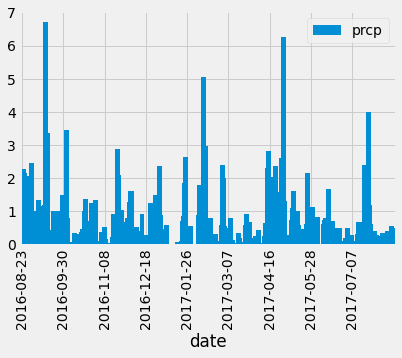

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_prior = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#print(year_prior)

# Perform a query to retrieve the date and precipitation scores.
precip = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precip, columns=['date', 'prcp'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot.bar(width=30)
plt.locator_params(axis='x', nbins=9)
plt.show()



In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Measurement.station).\
    group_by(Measurement.station).all()
print("There are "+str(len(stations)) + " stations in this dataset.")

There are 9 stations in this dataset.


In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_st = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

most_active_st = active_st[0][0]
print("Station " + most_active_st + " has the highest number of observations.")
active_st

Station USC00519281 has the highest number of observations.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station,
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]

active_temp = session.query(*sel).filter(Measurement.station == most_active_st).all()
active_temp
print("The lowest temperature measured by station " + most_active_st + " is " + str(active_temp[0][1]) + " degrees Fahrenheit.")
print("The highest temperature measured by station " + most_active_st + " is " + str(active_temp[0][2]) + " degrees Fahrenheit.")
print("The average temperature measured by station " + most_active_st + " is " + str(active_temp[0][3]) + " degrees Fahrenheit.")

The lowest temperature measured by station USC00519281 is 54.0 degrees Fahrenheit.
The highest temperature measured by station USC00519281 is 85.0 degrees Fahrenheit.
The average temperature measured by station USC00519281 is 71.66378066378067 degrees Fahrenheit.


Text(0.5, 1.0, '12 Month History of Temperature Observations by most active station')

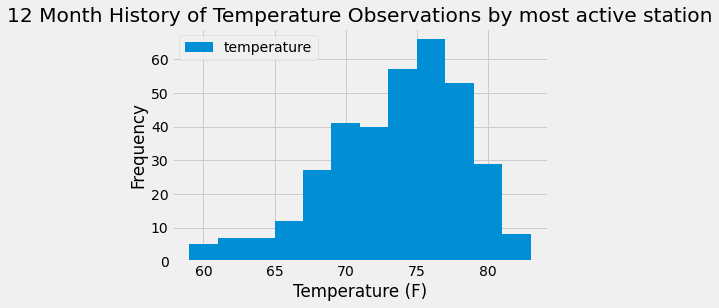

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel2 = [Measurement.station,
        Measurement.date,
        Measurement.tobs]

active_yr = session.query(*sel2).filter(Measurement.station == most_active_st).filter(Measurement.date >= year_prior).all()

df_t = pd.DataFrame(active_yr, columns=['station','date', 'temperature'])
df_t = df_t.iloc[:,1:]

df_t.plot.hist(bins=12)
plt.xlabel("Temperature (F)")
plt.title("12 Month History of Temperature Observations by most active station")

# Close session

In [30]:
# Close Session
session.close()